# Desafio 1 / Análisis inicial

In [5]:
import numpy as np
import pandas as pd
import re

link a los datos: http://campus.digitalhouse.com/mod/url/view.php?id=32168

In [6]:
data = pd.read_csv("properatti.csv")

In [3]:
# Inspeccionamos las columnas:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [79]:
# Establecemos algunos parámetros para tener una mejor visualización de la tabla:

pd.set_option('display.max_columns', 500)
pd.options.display.max_colwidth = 10000

# Contar y graficar el porcentaje de NaN - Total País

In [7]:
nulos = data.isnull().sum().sort_values(ascending = False).replace(0, np.nan).dropna() / data.iloc[:,0].count() * 100
nulos

floor                         93.483749
expenses                      88.234615
rooms                         60.905791
price_usd_per_m2              43.394654
lon                           42.525986
lat-lon                       42.525986
lat                           42.525986
surface_total_in_m2           32.443491
price_per_m2                  27.686850
currency                      16.837981
price_aprox_usd               16.837156
price_aprox_local_currency    16.837156
price                         16.837156
surface_covered_in_m2         16.422208
geonames_id                   15.440521
image_thumbnail                2.567233
place_name                     0.018974
description                    0.001650
dtype: float64

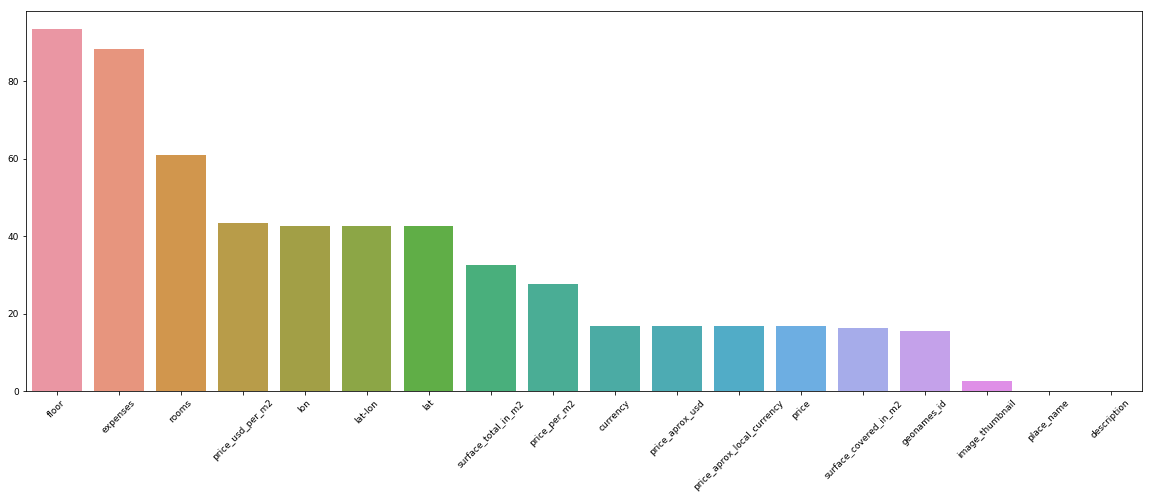

In [12]:
% matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams.update({'font.size': 9})
plt.figure(figsize = (20,7))
graph = sns.barplot(nulos.index, nulos.values)
graph.set_xticklabels(graph.get_xticklabels() ,rotation=45)
plt.show()

# Contar y graficar el porcentaje de NaN - Total Capital Federal

In [7]:
nulos_capital = data[data['state_name'] == 'Capital Federal'].isnull().sum().sort_values(ascending = False).replace(0, np.nan).dropna() / data[data['state_name'] == 'Capital Federal'].iloc[:,0].count() * 100
nulos_capital

floor                         90.688823
expenses                      79.601436
rooms                         52.577671
price_usd_per_m2              27.484837
lon                           26.445105
lat-lon                       26.445105
lat                           26.445105
surface_total_in_m2           18.192227
price_per_m2                  15.447456
currency                      10.205471
price_aprox_usd               10.205471
price_aprox_local_currency    10.205471
price                         10.205471
surface_covered_in_m2          7.237901
geonames_id                    3.979453
image_thumbnail                1.510088
dtype: float64

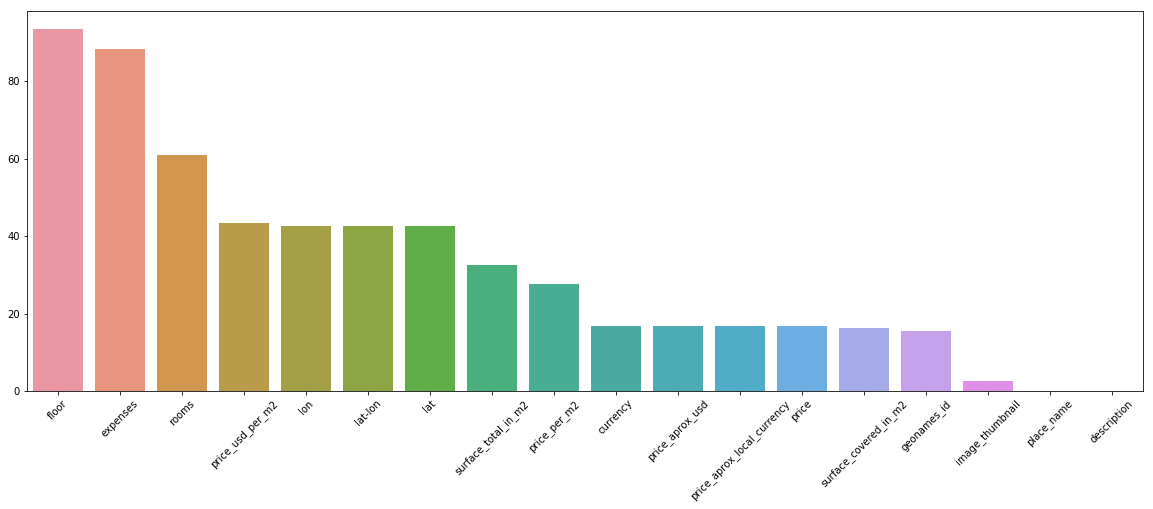

In [8]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,7))
graph = sns.barplot(nulos.index, nulos.values)
graph.set_xticklabels(graph.get_xticklabels() ,rotation=45)
plt.show()

# Calculo del precio por m2 total y cubierto

In [14]:
data["USD_por_m2_total"] = data['price_aprox_usd'] / data['surface_total_in_m2']
data["USD_por_m2_total"].head(10)

0    1127.272727
1            NaN
2    1309.090909
3            NaN
4    1828.571429
5            NaN
6    1226.415094
7    3066.666667
8    3000.000000
9            NaN
Name: USD_por_m2_total, dtype: float64

In [15]:
data["USD_por_m2_cubierto"] = data['price_aprox_usd'] / data['surface_covered_in_m2']
data["USD_por_m2_cubierto"].head(10)

0    1550.000000
1            NaN
2    1309.090909
3            NaN
4    1828.571429
5            NaN
6    1666.666667
7    3450.000000
8    3250.000000
9            NaN
Name: USD_por_m2_cubierto, dtype: float64

# Un modelo de regex para contar características que puedan influir en el precio:

In [16]:
patron = r'(pileta|pisci)'
regex = re.compile(patron, flags=re.IGNORECASE)
data.description.apply(lambda x: bool(regex.search(str(x)))).sum()

32791

In [52]:
patron = r'(alquiler)'
regex = re.compile(patron, flags=re.IGNORECASE)
data["muestra"] = 1 * data.description.apply(lambda x: bool(regex.search(str(x))))
data.description[data.muestra == 1].sample(5)

42295     Lindisimo departamento a estrenar. 2 ambientes con Patio y Balcon.Edificio estilo moderno con estetica de Loft, losas vistas y bandejas de cinc para  iluminacion.Agua caliente por caldera central.Barandas con malla metálica de matriceria alemanaPisos de porcellanato en baño y cocinaGriferias FV y sanitarios FerrumCocina y anafe electricos ARISTONInstalacion para Aire acondicionadoAscensor con piston hidraulicoPortero visorCarpinterias ALUAR A30 con doble vidrio y pùertas cortafuego.NO ES APTO CREDITOLos m2 informados son FOT Cochera opcional usd 25000ADVERTENCIA IMPORTANTE: Los montos especificados de expensas responden a una declaración del propietario el día que fue visitada la propiedad por nuestro personal, habitualmente el mismo NO esta actualizado. Verificar el monto actualizado previo al alquiler/compra de la propiedad. Las medidas, superficies consignados en la presente son FOT aproximados y que no resultan vinculantes, los datos definitivos son los que surgen del tít

# Y acá como ir agregándolas como columnas al dataframe

In [6]:
patron = r'(pileta|pisci)'
regex = re.compile(patron, flags=re.IGNORECASE)
data["pileta"] = 1 * data.description.apply(lambda x: bool(regex.search(str(x))))

In [7]:
patron = r'(ameni|gimn|gym|laundry|sum|usos mult|solarium)'
regex = re.compile(patron, flags=re.IGNORECASE)
data["amenities"] = 1 * data.description.apply(lambda x: bool(regex.search(str(x))))

In [8]:
patron = r'(estre)'
regex = re.compile(patron, flags=re.IGNORECASE)
data["a estrenar"] = 1 * data.description.apply(lambda x: bool(regex.search(str(x))))

In [9]:
patron = r'(subte)'
regex = re.compile(patron, flags=re.IGNORECASE)
data["subte"] = 1 * data.description.apply(lambda x: bool(regex.search(str(x))))

In [10]:
patron = r'(garage|cocher)'
regex = re.compile(patron, flags=re.IGNORECASE)
data["cochera"] = 1 * data.description.apply(lambda x: bool(regex.search(str(x))))

In [19]:
data.loc[:,'pileta':'cochera'].sum()

pileta        32791
amenities     27094
a estrenar    11031
subte          7503
cochera       50505
dtype: int64

In [20]:
patron = r'(pozo|cuota|proyec|emprendim)'
regex = re.compile(patron, flags=re.IGNORECASE)
data.description.apply(lambda x: bool(regex.search(str(x)))).sum()

17441

In [ ]:
patron = r'(pozo|cuota|proyec|emprendim)'
regex = re.compile(patron, flags=re.IGNORECASE)
data["pozo"] = 1 * data.description.apply(lambda x: bool(regex.search(str(x))))
data = data[data.pozo == 0]
data = data.drop(['pozo'], axis = 1)

# Conseguir dummies de una columna y graficarla:

In [17]:
data = pd.read_csv("properattilimpio.csv")

FileNotFoundError: File b'properattilimpio.csv' does not exist

In [16]:
data.head()

,Unnamed: 0,ID,operation,TIPO_PROPIEDAD,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,PAIS,PROVINCIA,CIUDAD-PARTIDO,BARRIO,pileta,amenities,a estrenar,subte,cochera,USD_por_m2_total,USD_por_m2_cubierto
0,0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inmobiliaria-fedele,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIKufMJMwHtquzhk=/trim/198x0/smart/filters:strip_icc()/inmobiliariafedele.com/photos/CARHUE%202278-IMG_3400.JPG,Argentina,Capital Federal,Capital Federal,Mataderos,0,0,0,0,0,1127.272727,1550.000000
1,1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_departamentos_la-plata_balcon_lavadero_toilette_garage_estrenar_antonini-propiedades_dcp,"Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000 Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv45KAKirGL3JM8=/trim/198x0/smart/filters:strip_icc()/antoninipropiedades.com/photos/401-1-7%20y%2037%2010A%201.jpg,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,SIN DATO,0,0,1,0,1,NaN,NaN
2,2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_departamentos_mataderos_lavadero_placard_inmobiliaria-fedele,"2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_Ejwfu6QpW4cH0=/trim/198x0/smart/filters:strip_icc()/inmobiliariafedele.com/photos/GUAMINI%201171-IMG_3403.JPG,Argentina,Capital Federal,Capital Federal,Mataderos,0,0,0,0,0,1309.090909,1309.090909
3,3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso.Reciclado a nuevo. ""Muy buen estado"" Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SPyleyeQlIypI8w=/trim/198x0/smart/filters:strip_icc()/ggoffredo.com/photos/GG0040-1563480102.jpg,Argentina,Capital Federal,Capital Federal,Liniers,0,0,0,0,0,NaN,N

In [10]:
dummy = pd.get_dummies(data.PROVINCIA)
propiedades_por_provincia = dummy.sum().sort_values(ascending = False)

o = 0
for p in propiedades_por_provincia:
    if p < 2500:
        o += p
otros = pd.Series([o], index=['Otros'])
       
propiedades_por_provincia = propiedades_por_provincia.append(otros)
propiedades_por_provincia = propiedades_por_provincia[propiedades_por_provincia > 2500]
propiedades_por_provincia

Capital Federal                 26214
Bs.As. G.B.A. Zona Norte        22045
Bs.As. G.B.A. Zona Sur          12817
Córdoba                         10781
Buenos Aires Costa Atlántica     9413
Bs.As. G.B.A. Zona Oeste         8444
Santa Fe                         7231
Otros                            6834
dtype: int64

In [13]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams.update({'font.size': 9})

plt.figure(figsize = (20,10))
graph = sns.barplot(propiedades_por_provincia.index, propiedades_por_provincia.values)

NameError: name 'propiedades_por_provincia' is not defined

In [55]:
dummy = pd.get_dummies(data.TIPO_PROPIEDAD[data['PROVINCIA'] == 'Capital Federal'])
tipo_propiedad = dummy.sum().sort_values(ascending = False)
tipo_propiedad

apartment    21132
house         2011
PH            1791
store         1280
dtype: int64

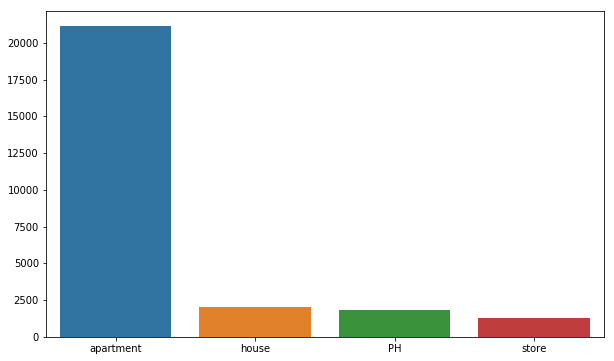

In [58]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))
graph = sns.barplot(tipo_propiedad.index, tipo_propiedad.values)

# Hacer scatter

In [59]:
data.columns

Index(['Unnamed: 0', 'ID', 'operation', 'TIPO_PROPIEDAD', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'PAIS', 'PROVINCIA', 'CIUDAD-PARTIDO', 'BARRIO',
       'pileta', 'amenities', 'a estrenar', 'subte', 'cochera',
       'USD_por_m2_total', 'USD_por_m2_cubierto'],
      dtype='object')

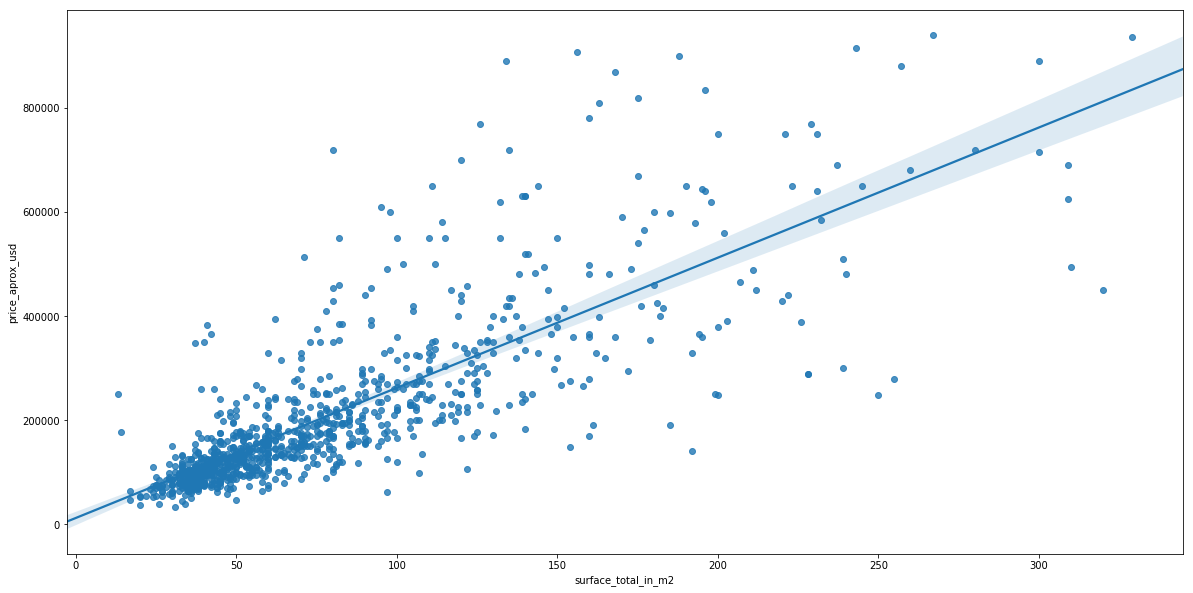

In [20]:
datanorm = data[(data.surface_total_in_m2 < 400) & (data.surface_total_in_m2 > 10) & 
                (data.price_aprox_usd < 1000000) & (data.price_aprox_usd > 10000) 
                & (data.TIPO_PROPIEDAD == 'apartment') & (data.PROVINCIA == 'Capital Federal')].sample(1000)

plt.figure(figsize = (20,10))
sns.regplot(x=datanorm["surface_total_in_m2"], y=datanorm["price_aprox_usd"])

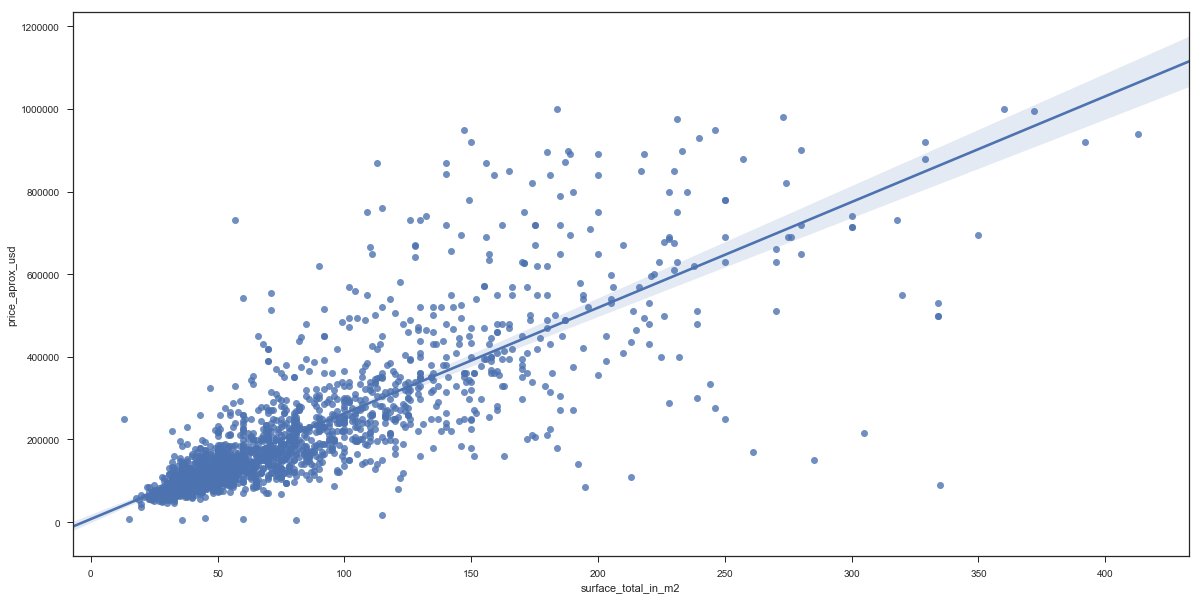

In [109]:
datanorm = data[(data.surface_total_in_m2 < data.surface_total_in_m2.mean() + 2 * data.surface_total_in_m2.std()) 
                & (data.surface_total_in_m2 > 10) 
                & (data.price_aprox_usd < data.price_aprox_usd.mean() + 2 * data.price_aprox_usd.std()) 
                & (data.price_aprox_usd > 1000) 
                & (data.TIPO_PROPIEDAD == 'apartment') & (data.PROVINCIA == 'Capital Federal')].sample(2000)

plt.figure(figsize = (20,10))
sns.regplot(x=datanorm["surface_total_in_m2"], y=datanorm["price_aprox_usd"])

In [102]:
data.surface_total_in_m2.describe()

count     68362.000000
mean        246.112255
std        1730.814245
min           0.000000
25%          53.000000
50%          94.000000
75%         226.000000
max      200000.000000
Name: surface_total_in_m2, dtype: float64

Text(0,1,'Precio por superficie:')

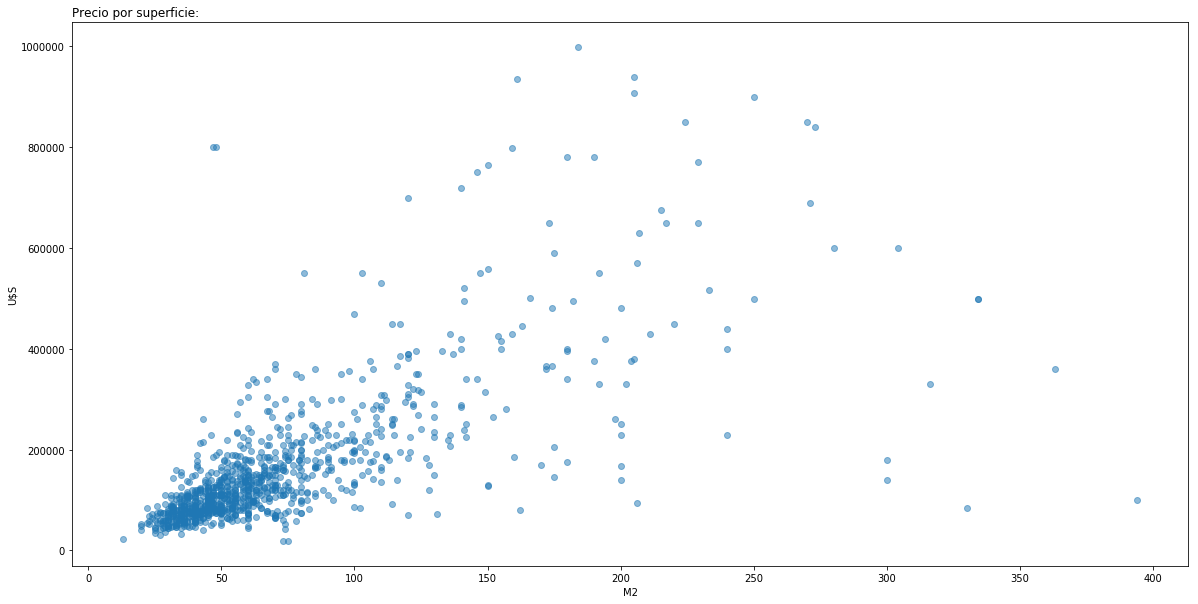

In [88]:
datanorm = data[(data.surface_total_in_m2 < 400) & (data.surface_total_in_m2 > 10) & 
                (data.price_aprox_usd < 1000000) & (data.price_aprox_usd > 10000) 
                & (data.TIPO_PROPIEDAD == 'apartment')].sample(1000)


plt.figure(figsize = (20,10))
plt.plot( 'surface_total_in_m2', 'price_aprox_usd', data=datanorm, linestyle='', marker='o', alpha = 0.5)
plt.xlabel('M2')
plt.ylabel('U$S')
plt.title('Precio por superficie:', loc='left')

# Hacer histogramas

In [18]:
#Saqué los de más de 1MU$S porque sino se va de mambo
USD_por_m2_cubierto_CABA = data['USD_por_m2_cubierto'][(data['state_name'] == 'Capital Federal') & (data['USD_por_m2_cubierto'] < 5000)].replace([np.inf, -np.inf], np.nan).dropna()
USD_por_m2_cubierto_CABA.describe()

count    24669.000000
mean      2670.435445
std        829.886053
min          3.208556
25%       2107.142857
50%       2617.647059
75%       3187.500000
max       4999.500000
Name: USD_por_m2_cubierto, dtype: float64

No handles with labels found to put in legend.


Text(0.5,1,'Histograma')

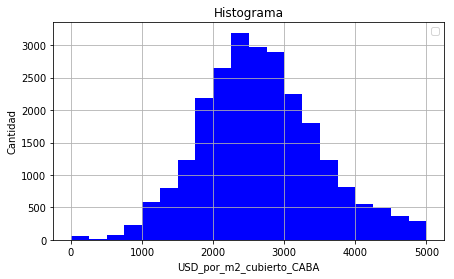

In [19]:
plt.figure(figsize=(7, 4))
plt.hist(USD_por_m2_cubierto_CABA,color = 'b', bins=20)
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('USD_por_m2_cubierto_CABA')
plt.ylabel('Cantidad')
plt.title('Histograma')

In [35]:
import numpy as np
import pandas as pd
import re
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv("./DATA/properattilimpio.csv")

In [37]:
data.columns

Index(['Unnamed: 0', 'ID', 'operation', 'TIPO_PROPIEDAD', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'PAIS', 'PROVINCIA', 'CIUDAD-PARTIDO', 'BARRIO',
       'pileta', 'amenities', 'a estrenar', 'subte', 'cochera',
       'USD_por_m2_total', 'USD_por_m2_cubierto'],
      dtype='object')

In [87]:
data.describe()

,Unnamed: 0,ID,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,pileta,amenities,a estrenar,subte,cochera,USD_por_m2_total,USD_por_m2_cubierto
count,103779.000000,103779.000000,8.744000e+04,61216.000000,61216.000000,8.643000e+04,8.643000e+04,8.643000e+04,68362.000000,85689.000000,57432.000000,7.421300e+04,6783.000000,40850.000000,1.336000e+04,103779.000000,103779.000000,103779.000000,103779.000000,103779.000000,5.762900e+04,7.421400e+04
mean,59960.714663,59960.714663,3.573762e+06,-34.660478,-59.233361,4.148009e+05,4.282499e+06,2.427102e+05,246.112255,141.713382,1914.779130,5.621770e+03,17.767360,3.200098,5.188834e+03,0.248711,0.176269,0.089835,0.054346,0.394550,inf,inf
std,34935.668729,34935.668729,3.679301e+05,2.016599,2.285367,2.384516e+06,7.079166e+06,4.012109e+05,1730.814245,777.050619,1538.047774,2.928491e+04,125.657475,1.867862,1.244345e+05,0.432268,0.381051,0.285947,0.226701,0.488756,NaN,NaN
min,0.000000,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e-01,1.510204e+00
25%,30281.500000,30281.500000,3.430234e+06,-34.690265,-58.708276,1.090000e+05,1.588005e+06,9.000000e+04,53.000000,48.000000,1142.507967,1.492537e+03,1.000000,2.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.142857e+03,1.397059e+03
50%,59429.000000,59429.000000,3.433782e+06,-34.600725,-58.477368,1.800000e+05,2.629030e+06,1.490000e+05,94.000000,81.000000,1745.049020,2.091988e+03,3.000000,3.000000,2.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.750000e+03,1.931818e+03
75%,90045.500000,90045.500000,3.835943e+06,-34.453999,-58.390877,3.800000e+05,4.764015e+06,2.700000e+05,226.000000,165.000000,2407.407407,3.058824e+03,6.000000,4.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,2.419355e+03,2.666667e+03
max,121219.000000,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,80000.000000,4.000000e+06,3150.000000,32.000000,1.000150e+07,1.000000,1.000000,1.000000,1.000000,1.000000,inf,inf


In [95]:
datacorr = data[(data.rooms < data.rooms.mean() + 2 * data.rooms.std()) & (data.rooms > 0)
                & (data.price_usd_per_m2 < data.price_usd_per_m2.mean() + 2 * data.price_usd_per_m2.std())
               & (data.PROVINCIA == 'Capital Federal')]
datacorr.describe()

,Unnamed: 0,ID,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,pileta,amenities,a estrenar,subte,cochera,USD_por_m2_total,USD_por_m2_cubierto
count,7885.000000,7885.000000,7.422000e+03,7657.000000,7657.000000,7.885000e+03,7.885000e+03,7.885000e+03,7885.000000,7736.000000,7885.000000,7736.000000,738.000000,7885.000000,1.395000e+03,7885.000000,7885.000000,7885.000000,7885.000000,7885.000000,7885.000000,7736.000000
mean,43530.775650,43530.775650,3.592612e+06,-34.600367,-58.434028,2.345468e+05,3.871030e+06,2.193902e+05,115.803678,78.325233,2444.412210,3177.008059,4.594851,2.792517,1.764879e+04,0.159797,0.222321,0.093342,0.219023,0.311224,2444.412210,2798.858923
std,29615.852881,29615.852881,7.041930e+05,0.050353,0.070521,5.807967e+05,9.771288e+06,5.537866e+05,2252.398910,70.083216,802.340609,4592.091083,5.588059,1.290727,3.784533e+05,0.366441,0.415832,0.290929,0.413611,0.463023,802.340609,1410.452085
min,16.000000,16.000000,3.427366e+06,-38.416097,-63.616672,9.500000e+03,9.160353e+04,5.191620e+03,12.000000,3.000000,91.081053,51.728832,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,91.081053,51.728832
25%,22332.000000,22332.000000,3.430087e+06,-34.617405,-58.460108,1.060000e+05,1.852672e+06,1.050000e+05,45.000000,40.000000,1923.076923,2157.894737,2.000000,2.000000,1.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1923.076923,2155.555556
50%,39513.000000,39513.000000,3.433918e+06,-34.600387,-58.433322,1.550000e+05,2.734898e+06,1.550000e+05,69.000000,60.000000,2365.789474,2659.574468,3.000000,3.000000,2.200000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2365.789474,2651.154401
75%,55443.000000,55443.000000,3.436077e+06,-34.582951,-58.402010,2.550000e+05,4.411125e+06,2.500000e+05,110.000000,94.000000,2888.888889,3250.000000,6.000000,4.000000,3.800000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,2888.888889,3235.294118
max,120088.000000,120088.000000,6.693230e+06,-34.536202,-58.358117,4.654544e+07,8.212711e+08,4.654544e+07,200000.000000,3673.000000,4972.222222,90805.076923,117.000000,6.000000,1.000150e+07,1.000000,1.000000,1.000000,1.000000,1.000000,4972.222222,46000.000000


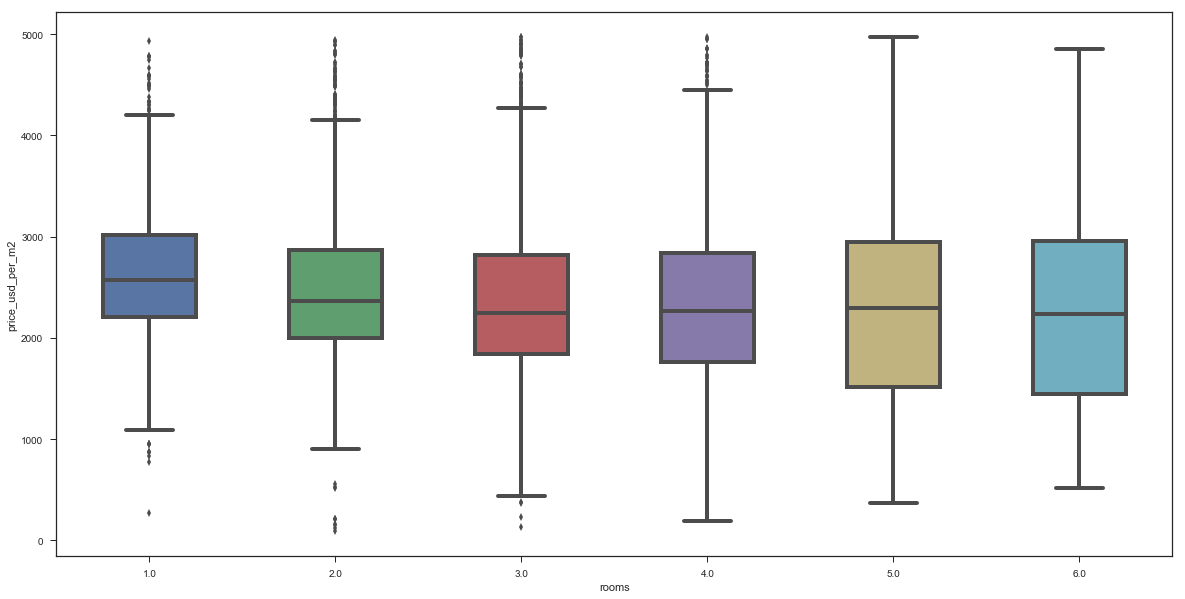

In [146]:
plt.figure(figsize = (20,10))
sns.set(style = "ticks")
sns.boxplot(x = 'rooms', y = 'price_usd_per_m2', hue = 'rooms', orient='v',data = datacorr, linewidth=4, width=.5, dodge = False)
legend = []
plt.legend(legend)
plt.show()

In [112]:
datacorr2 = data[(data.price_usd_per_m2 < data.price_usd_per_m2.mean() + 2 * data.price_usd_per_m2.std())
               & (data.PROVINCIA == 'Capital Federal')]
datacorr2.describe()

,Unnamed: 0,ID,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,pileta,amenities,a estrenar,subte,cochera,USD_por_m2_total,USD_por_m2_cubierto
count,17765.000000,17765.000000,1.699800e+04,14025.000000,14025.000000,1.776500e+04,1.776500e+04,1.776500e+04,17765.000000,16838.000000,17765.000000,16837.000000,1188.000000,8029.000000,5.309000e+03,17765.000000,17765.000000,17765.000000,17765.000000,17765.000000,17765.000000,1.683800e+04
mean,60886.940445,60886.940445,3.544947e+06,-34.600774,-58.435921,3.078979e+05,4.295708e+06,2.434588e+05,133.801801,95.909847,2410.642519,4287.528561,4.541246,2.884917,7.052098e+03,0.189474,0.256797,0.104813,0.187278,0.329693,2410.642519,inf
std,33742.425504,33742.425504,5.949226e+05,0.041503,0.058811,6.682360e+05,7.984995e+06,4.525486e+05,1519.890387,183.602200,846.982671,10728.074008,4.905079,1.467114,1.940772e+05,0.391895,0.436879,0.306321,0.390146,0.470115,846.982671,NaN
min,0.000000,0.000000,3.427366e+06,-38.416097,-63.616672,9.500000e+03,9.005064e+04,5.103610e+03,10.000000,0.000000,13.797467,24.207190,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,13.797467,2.420719e+01
25%,32133.000000,32133.000000,3.430087e+06,-34.619863,-58.463837,1.094000e+05,1.859730e+06,1.054000e+05,44.000000,40.000000,1882.352941,2160.493827,2.000000,2.000000,1.250000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1882.352941,2.148870e+03
50%,60047.000000,60047.000000,3.433775e+06,-34.600892,-58.436086,1.635880e+05,2.775198e+06,1.572840e+05,68.000000,60.000000,2365.591398,2712.121212,3.000000,3.000000,2.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2365.591398,2.681818e+03
75%,87538.000000,87538.000000,3.436003e+06,-34.581999,-58.403491,2.900000e+05,4.764015e+06,2.700000e+05,120.000000,101.000000,2888.888889,3333.333333,6.000000,4.000000,3.800000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,2888.888889,3.263889e+03
max,121219.000000,121219.000000,6.693230e+06,-34.535096,-58.354956,4.654544e+07,8.212711e+08,4.654544e+07,200000.000000,10958.000000,4989.285714,650000.000000,117.000000,15.000000,1.000150e+07,1.000000,1.000000,1.000000,1.000000,1.000000,4989.285714,inf


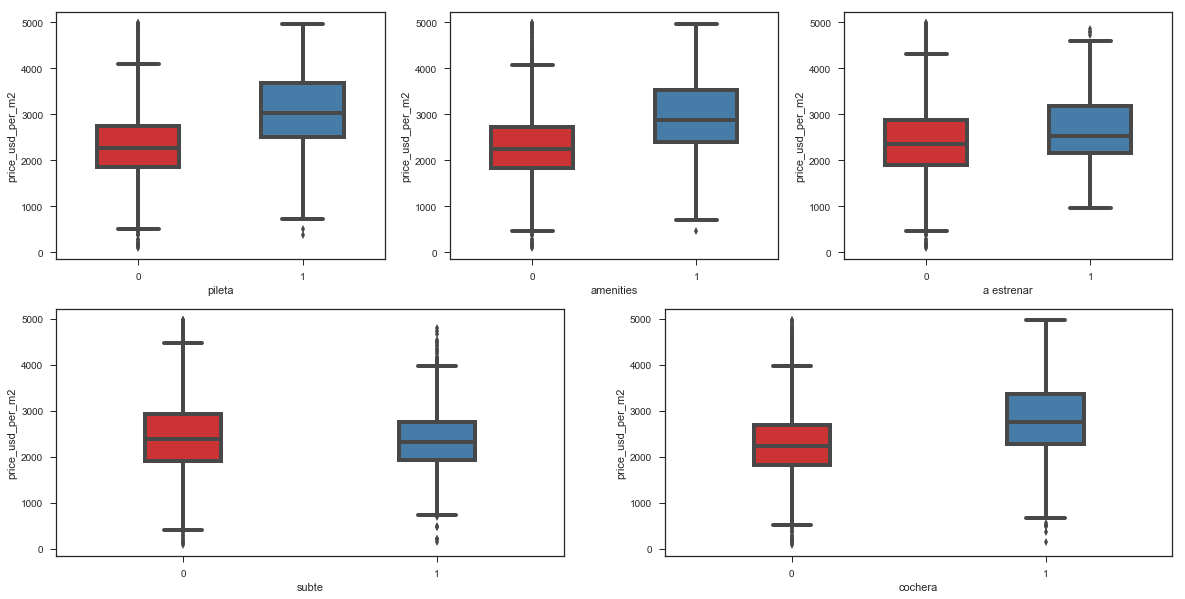

In [143]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.set(style = "ticks")
sns.boxplot(x = 'pileta', y = 'price_usd_per_m2', hue = 'pileta', orient='v',data = datacorr, linewidth=4, width=.5
            , dodge = False, palette = 'Set1')
legend = []
plt.legend(legend)

plt.subplot(2,3,2)
sns.set(style = "ticks")
sns.boxplot(x = 'amenities', y = 'price_usd_per_m2', hue = 'amenities', orient='v',data = datacorr, linewidth=4, width=.5
            , dodge = False, palette = 'Set1')
legend = []
plt.legend(legend)

plt.subplot(2,3,3)
sns.set(style = "ticks")
sns.boxplot(x = 'a estrenar', y = 'price_usd_per_m2', hue = 'a estrenar', orient='v',data = datacorr, linewidth=4, width=.5
            , dodge = False, palette = 'Set1')
legend = []
plt.legend(legend)

plt.subplot(2,2,3)
sns.set(style = "ticks")
sns.boxplot(x = 'subte', y = 'price_usd_per_m2', hue = 'subte', orient='v',data = datacorr, linewidth=4, width=.3
            , dodge = False, palette = 'Set1')
legend = []
plt.legend(legend)

plt.subplot(2,2,4)
sns.set(style = "ticks")
sns.boxplot(x = 'cochera', y = 'price_usd_per_m2', hue = 'cochera', orient='v',data = datacorr, linewidth=4, width=.3
            , dodge = False, palette = 'Set1')
legend = []
plt.legend(legend)